# Clustering Fuzzy C Means

* Nama : Zainal Arifin
* Link Git : https://github.com/220411100103-Zainal-Arifin/PPW
* Link : https://huggingface.co/spaces/leinna/clustering

## Installasi Library


In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

- **numpy**: Operasi numerik dan manipulasi array.  
- **pandas**: Manipulasi dan analisis data berbentuk tabel.  
- **TruncatedSVD**: Reduksi dimensi data menggunakan SVD.  
- **cmeans**: Clustering menggunakan metode Fuzzy C-Means.  
- **LabelEncoder**: Encoding label kategorikal menjadi numerik.  
- **accuracy_score**: Menghitung akurasi prediksi.  
- **matplotlib.pyplot**: Membuat visualisasi data dan grafik.  

## Load Data

In [ ]:
file_path = "berita_vsm_new.csv"
data = pd.read_csv(file_path)

## Memisahkan label dan data fitur

In [ ]:
labels = data['Category']
features = data.drop('Category', axis=1).values

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

### **Data Sebelum Reduksi**

In [ ]:
results = {}

data_before_reduction = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(features.shape[1])])
print("Data Sebelum Reduksi Dimensi:")
data_before_reduction

Data Sebelum Reduksi Dimensi:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_2800,Feature_2801,Feature_2802,Feature_2803,Feature_2804,Feature_2805,Feature_2806,Feature_2807,Feature_2808,Feature_2809
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.070723,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.074545,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.0,0.0,0.0,0.099906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.000000,0.0,0.0,0.0,0.041807,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Fuzzy C-Means Clustering dan SVD untuk dimensi yang berbeda

SVD adalah metode matematis yang digunakan untuk dekomposisi matriks. Dalam konteks pemrosesan data, SVD memecah matriks menjadi tiga matriks yang lebih sederhana. Tujuan utamanya adalah untuk mengurangi dimensi data dan menemukan pola tersembunyi dalam data. Fuzzy C-Means (FCM) adalah metode clustering yang memperbolehkan sebuah data menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu (bukan hanya keanggotaan keras seperti pada K-Means).

In [ ]:
for dim in range(features.shape[1], 99, -1):
    svd = TruncatedSVD(n_components=dim)
    reduced_features = svd.fit_transform(features)

    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,
        m=2.0,
        error=0.005,
        maxiter=1000
    )

    cluster_membership = np.argmax(u, axis=0)

    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)
    )

    results[dim] = {
        'svd_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

### **Data Setelah Reduksi**

In [ ]:
final_result = results[100]
svd_features = final_result['svd_features']
data_after_reduction = pd.DataFrame(svd_features, columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])
print("Data Setelah Reduksi Dimensi (100 dimensi):")
data_after_reduction

Data Setelah Reduksi Dimensi (100 dimensi):


,SVD_Component_1,SVD_Component_2,SVD_Component_3,SVD_Component_4,SVD_Component_5,SVD_Component_6,SVD_Component_7,SVD_Component_8,SVD_Component_9,SVD_Component_10,...,SVD_Component_91,SVD_Component_92,SVD_Component_93,SVD_Component_94,SVD_Component_95,SVD_Component_96,SVD_Component_97,SVD_Component_98,SVD_Component_99,SVD_Component_100
0,0.306413,-0.147986,0.328073,-0.006153,-0.029639,0.008228,0.065608,-0.094432,0.090398,-0.166860,...,0.040895,0.048102,0.041483,0.058444,-0.013457,0.044800,0.015591,0.006095,-0.008849,-0.000315
1,0.109184,-0.101372,0.061930,0.059828,0.039581,0.022015,0.020911,0.011857,0.035327,-0.001513,...,-0.031353,-0.009594,-0.029479,0.011864,0.025014,-0.027362,-0.007758,-0.010654,0.008499,0.002273
2,0.435123,0.124422,0.070231,-0.027458,0.012832,0.022024,-0.114094,0.179828,0.019299,-0.207100,...,0.003517,0.119355,-0.311041,-0.042145,0.197151,-0.011630,-0.023912,0.025906,0.000107,0.003375
3,0.147943,-0.184795,0.297279,-0.044936,-0.179886,-0.032705,-0.110904,0.102213,-0.004656,-0.097335,...,0.011020,0.000761,0.012594,0.007924,-0.017362,-0.008665,-0.003334,-0.014812,0.011600,0.000298
4,0.336555,-0.212578,0.386219,-0.134260,-0.134770,-0.029009,-0.127980,-0.003751,-0.023625,-0.050038,...,0.046336,-0.024946,-0.143004,-0.021751,-0.049014,-0.014761,0.009729,0.027495,-0.011706,0.002693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.056749,-0.143352,-0.093414,-0.082935,0.038523,-0.024340,-0.037224,0.167790,0.529492,0.388373,...,0.023597,-0.010853,0.066091,-0.005164,0.058351,0.084032,-0.387400,-0.005914,-0.013070,0.008870
96,0.067654,-0.189175,-0.111212,-0.108010,0.040164,-0.030665,-0.033796,0.169885,0.554016,0.390112,...,-0.021297,0.012201,-0.075892,0.003201,-0.063944,-0.090819,0.394065,-0.001433,0.017724,-0.006887
97,0.113087,-0.418609,-0.334410,-0.348561,0.172595,-0.139917,-0.092610,0.103436,0.151290,-0.096037,...,-0.040514,0.102930,-0.069465,-0.244180,-0.261330,-0.014548,-0.094450,-0.007797,0.011555,-0.004624
98,0.099101,-0.071538,-0.008447,0.037296,-0.040852,-0.011420,0.074116,-0.076727,0.044838,-0.032937,...,-0.005745,0.015465,0.008960,-0.004006,0.014300,-0.007093,0.001874,0.020185,-0.006060,0.000819


## Scater Plot Dimensi 2

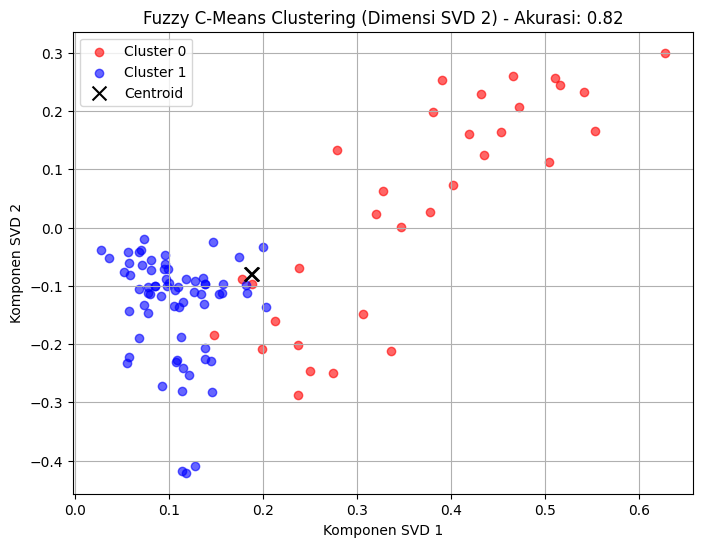

In [ ]:
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD 2) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()

## Akurasi Tiap Dimensi

In [ ]:
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")

Dimensi: 2809, Akurasi: 0.68
Dimensi: 2808, Akurasi: 0.85
Dimensi: 2807, Akurasi: 0.75
Dimensi: 2806, Akurasi: 0.65
Dimensi: 2805, Akurasi: 0.70
Dimensi: 2804, Akurasi: 0.64
Dimensi: 2803, Akurasi: 0.52
Dimensi: 2802, Akurasi: 0.70
Dimensi: 2801, Akurasi: 0.72
Dimensi: 2800, Akurasi: 0.59
Dimensi: 2799, Akurasi: 0.62
Dimensi: 2798, Akurasi: 0.59
Dimensi: 2797, Akurasi: 0.79
Dimensi: 2796, Akurasi: 0.68
Dimensi: 2795, Akurasi: 0.72
Dimensi: 2794, Akurasi: 0.79
Dimensi: 2793, Akurasi: 0.67
Dimensi: 2792, Akurasi: 0.74
Dimensi: 2791, Akurasi: 0.82
Dimensi: 2790, Akurasi: 0.74
Dimensi: 2789, Akurasi: 0.82
Dimensi: 2788, Akurasi: 0.70
Dimensi: 2787, Akurasi: 0.81
Dimensi: 2786, Akurasi: 0.52
Dimensi: 2785, Akurasi: 0.76
Dimensi: 2784, Akurasi: 0.74
Dimensi: 2783, Akurasi: 0.69
Dimensi: 2782, Akurasi: 0.77
Dimensi: 2781, Akurasi: 0.80
Dimensi: 2780, Akurasi: 0.68
Dimensi: 2779, Akurasi: 0.78
Dimensi: 2778, Akurasi: 0.71
Dimensi: 2777, Akurasi: 0.68
Dimensi: 2776, Akurasi: 0.64
Dimensi: 2775,

## Akurasi Terbaik

In [ ]:
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")


Akurasi terbaik: 0.94 pada dimensi 2211.


## Scater Plot Dimensi Terbaik

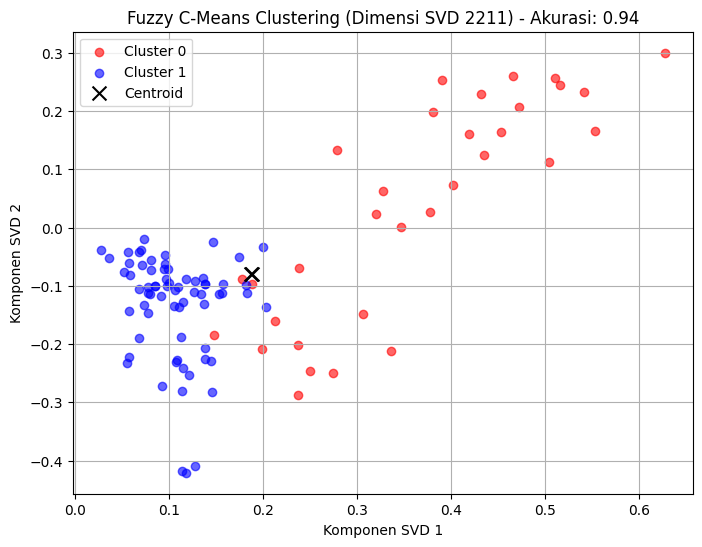

In [ ]:
# Scatter Plot untuk dimensi terbaik
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD {best_dim}) - Akurasi: {best_accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()


## Grafik Akurasi

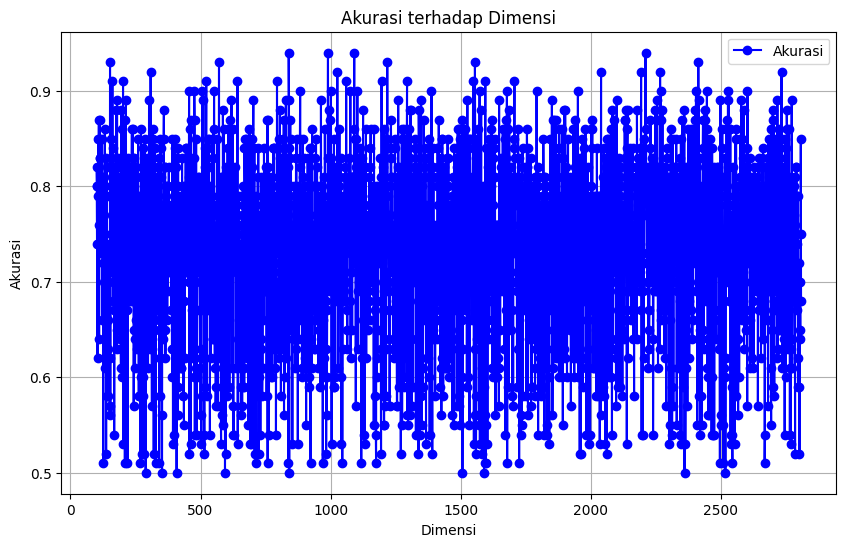

Dimensi dengan akurasi terbaik: 2211
Akurasi terbaik: 0.94


In [ ]:
accuracies = [result['accuracy'] for result in results.values()]
dimensions = list(results.keys())

plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies, marker='o', color='b', linestyle='-', label="Akurasi")
plt.xlabel('Dimensi')
plt.ylabel('Akurasi')
plt.title('Akurasi terhadap Dimensi')
plt.grid(True)
plt.legend()
plt.show()

print(f"Dimensi dengan akurasi terbaik: {best_dim}")
print(f"Akurasi terbaik: {best_accuracy:.2f}")